<a href="https://colab.research.google.com/github/CaroPer27/Pr-ctica-2.2-An-lisis-de-Componentes-Principales/blob/main/Practica2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Lee el archivo CSV y especifica las etiquetas de las columnas
column_labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N"]
wine_data = pd.read_csv('/content/drive/MyDrive/Wine.csv', names=column_labels)
wine_data.head(5)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Eliminamos el index

In [ ]:
wine_data = wine_data.drop('A', axis=1)

In [ ]:
wine_data.head(5)

,B,C,D,E,F,G,H,I,J,K,L,M,N
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Normalizamos los datos Por Min-Max

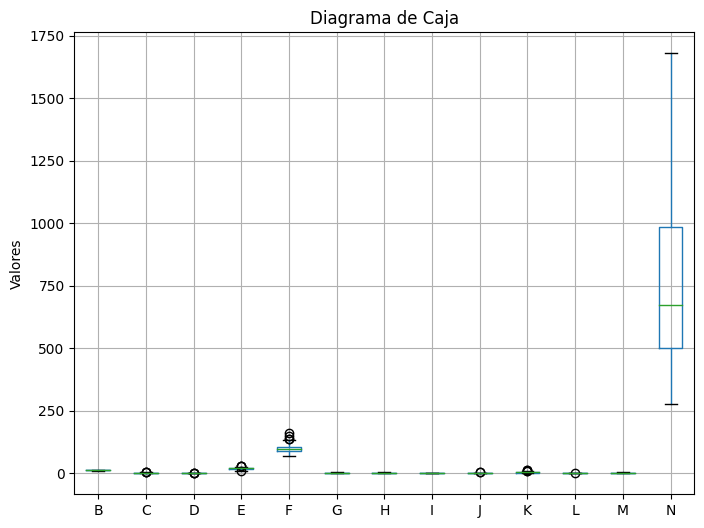

In [ ]:
import matplotlib.pyplot as plt

# Elejimos las columnas 'Fare' y 'Age'
data = wine_data[['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']]

# Creamos un diagrama de caja
plt.figure(figsize=(8, 6))
data.boxplot(column=['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'])
plt.title('Diagrama de Caja')
plt.ylabel('Valores')
plt.show()

In [ ]:
def min_max(df,B,C, D, E, F, G, H, I, J, K, L, M, N):
    # Obtenemos los mínimos y máximos para ambas columnas
    min_val1 = df[B].min()
    max_val1 = df[B].max()

    min_val2 = df[C].min()
    max_val2 = df[C].max()

    min_val3 = df[D].min()
    max_val3 = df[D].max()

    min_val4 = df[E].min()
    max_val4 = df[E].max()

    min_val5 = df[F].min()
    max_val5 = df[F].max()

    min_val6 = df[G].min()
    max_val6 = df[G].max()

    min_val7 = df[H].min()
    max_val7 = df[H].max()

    min_val8 = df[I].min()
    max_val8 = df[I].max()

    min_val9 = df[J].min()
    max_val9 = df[J].max()

    min_val10 = df[K].min()
    max_val10 = df[K].max()

    min_val11= df[L].min()
    max_val11= df[L].max()

    min_val12 = df[M].min()
    max_val12= df[M].max()

    min_val13 = df[N].min()
    max_val13= df[N].max()


    # Normalizamos ambas columnas
    df['B'] = (df[B] - min_val1) / (max_val1 - min_val1)
    df['C'] = (df[C] - min_val2) / (max_val2 - min_val2)
    df['D'] = (df[D] - min_val3) / (max_val3 - min_val3)
    df['E'] = (df[E] - min_val4) / (max_val4 - min_val4)
    df['F'] = (df[F] - min_val5) / (max_val5 - min_val5)
    df['G'] = (df[G] - min_val6) / (max_val6 - min_val6)
    df['H'] = (df[H] - min_val7) / (max_val7 - min_val7)
    df['I'] = (df[I] - min_val8) / (max_val8 - min_val8)
    df['J'] = (df[J] - min_val9) / (max_val9 - min_val9)
    df['K'] = (df[K] - min_val10) / (max_val10 - min_val10)
    df['L'] = (df[L] - min_val11) / (max_val11 - min_val11)
    df['M'] = (df[M] - min_val12) / (max_val12 - min_val12)
    df['N'] = (df[N] - min_val13) / (max_val13 - min_val13)

    return df

In [ ]:
df = min_max(wine_data, 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N')

In [ ]:
df.head(5)

,B,C,D,E,F,G,H,I,J,K,L,M,N
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


### Calculamos las medias para cada Dimension

In [ ]:

mediab=0
mediac=0
mediad=0
mediae=0
mediaf=0
mediag=0
mediah=0
mediai=0
mediaj=0
mediak=0
medial=0
mediam=0
median =0

for valor in df['B']:
    mediab += valor

for valor in df['C']:
    mediac += valor

for valor in df['D']:
    mediad += valor

for valor in df['E']:
    mediae += valor

for valor in df['F']:
    mediaf += valor

for valor in df['G']:
    mediag += valor

for valor in df['H']:
    mediah += valor

for valor in df['I']:
    mediai += valor

for valor in df['J']:
    mediaj += valor

for valor in df['K']:
    mediak += valor

for valor in df['L']:
    medial += valor

for valor in df['M']:
    mediam += valor

for valor in df['N']:
    median += valor

mediaB = mediab / len(df['B'])
mediaC = mediac / len(df['C'])
mediaD = mediad / len(df['D'])
mediaE = mediae / len(df['E'])
mediaF = mediaf / len(df['F'])
mediaG = mediag / len(df['G'])
mediaH = mediah / len(df['H'])
mediaI = mediai / len(df['I'])
mediaJ = mediaj / len(df['J'])
mediaK = mediak / len(df['K'])
mediaL = medial / len(df['L'])
mediaM = mediam / len(df['M'])
mediaN = median / len(df['N'])
print("La media de B es: ",mediaB)
print("La media de C es: ",mediaC)
print("La media de D es: ",mediaD)
print("La media de E es: ",mediaE)
print("La media de F es: ",mediaF)
print("La media de G es: ",mediaG)
print("La media de H es: ",mediaH)
print("La media de I es: ",mediaI)
print("La media de J es: ",mediaJ)
print("La media de K es: ",mediaK)
print("La media de L es: ",mediaL)
print("La media de M es: ",mediaM)
print("La media de N es: ",mediaN)

La media de B es:  0.518583678296866
La media de C es:  0.31548385664164863
La media de D es:  0.5382443069158204
La media de E es:  0.4585022587744701
La media de F es:  0.32327796775769413
La media de G es:  0.4534870205346767
La media de H es:  0.3563860048357276
La media de I es:  0.4374602501589992
La media de J es:  0.37252330485946195
La media de K es:  0.3223626179200061
La media de L es:  0.3881702749611765
La media de M es:  0.491459851010413
La media de N es:  0.3344459760534708


### Calcular la matriz de Covarianza

In [ ]:
import numpy as np

# Calcula la matriz de covarianza
cov_matrix = np.cov(df, rowvar=False)

print(cov_matrix)

[[ 0.04564144  0.00445243  0.00663033 -0.01140929  0.00898134  0.01332915
   0.0106614  -0.00782237  0.00527291  0.02308879 -0.0028484   0.00401945
   0.03088955]
 [ 0.00445243  0.04874375  0.00531346  0.01096463 -0.00187055 -0.01596959
  -0.01912203  0.01518881 -0.00879958  0.01087358 -0.02302864 -0.02117068
  -0.00952181]
 [ 0.00663033  0.00531346  0.02152324  0.0111971   0.00652718  0.00408364
   0.0035577   0.00641557  0.00025567  0.00751284 -0.00203563  0.00014923
   0.00736905]
 [-0.01140929  0.01096463  0.0111971   0.02963303 -0.00222701 -0.01192942
  -0.01274613  0.01462963 -0.00613315  0.00063784 -0.00876364 -0.01239066
  -0.01703587]
 [ 0.00898134 -0.00187055  0.00652718 -0.00222701  0.02410082  0.00718317
   0.00640499 -0.00934297  0.00662746  0.00614012  0.00159819  0.00266487
   0.01371611]
 [ 0.01332915 -0.01596959  0.00408364 -0.01192942  0.00718317  0.04657426
   0.03931838 -0.02280099  0.02386309 -0.0023537   0.01739245  0.03928524
   0.02414557]
 [ 0.0106614  -0.01912

In [ ]:
import numpy as np

# Calcula la matriz de covarianza
cov_matrix = np.cov(df, rowvar=False)

# Convierte la matriz de covarianza en un DataFrame de Pandas
cov_df = pd.DataFrame(cov_matrix, columns=df.columns, index=df.columns)

# Muestra la matriz de covarianza formateada
print(cov_df)

          B         C         D         E         F         G         H  \
B  0.045641  0.004452  0.006630 -0.011409  0.008981  0.013329  0.010661   
C  0.004452  0.048744  0.005313  0.010965 -0.001871 -0.015970 -0.019122   
D  0.006630  0.005313  0.021523  0.011197  0.006527  0.004084  0.003558   
E -0.011409  0.010965  0.011197  0.029633 -0.002227 -0.011929 -0.012746   
F  0.008981 -0.001871  0.006527 -0.002227  0.024101  0.007183  0.006405   
G  0.013329 -0.015970  0.004084 -0.011929  0.007183  0.046574  0.039318   
H  0.010661 -0.019122  0.003558 -0.012746  0.006405  0.039318  0.044407   
I -0.007822  0.015189  0.006416  0.014630 -0.009343 -0.022801 -0.026617   
J  0.005273 -0.008800  0.000256 -0.006133  0.006627  0.023863  0.024834   
K  0.023089  0.010874  0.007513  0.000638  0.006140 -0.002354 -0.007185   
L -0.002848 -0.023029 -0.002036 -0.008764  0.001598  0.017392  0.021283   
M  0.004019 -0.021171  0.000149 -0.012391  0.002665  0.039285  0.043142   
N  0.030890 -0.009522  0.

In [ ]:
# Calcular los valores y vectores propios
valores_propios , vectores_propios = np.linalg.eig(cov_matrix)
print('Valores propios = ',valores_propios)
print('Vectores propios = ', vectores_propios)


Valores propios =  [0.2200922  0.10246084 0.04624247 0.04011226 0.03005877 0.02516286
 0.01978926 0.00440241 0.0074605  0.00687688 0.01301012 0.01228411
 0.01215769]
Vectores propios =  [[-1.33367664e-01 -5.50883679e-01  8.38483848e-02 -4.03281504e-02
   2.78010089e-01 -1.37254317e-01 -2.75352205e-01  1.13596663e-02
  -2.80684930e-01 -5.61269360e-02  5.55030622e-01 -3.26686683e-01
  -3.59116648e-02]
 [ 2.48515807e-01 -2.27390577e-01 -4.92039271e-01  4.86032016e-01
   4.12889958e-01 -2.13102785e-01  3.10301653e-01  2.94277481e-02
   1.70374648e-01  6.16542748e-02 -7.69281456e-02  1.44706000e-02
  -2.37072825e-01]
 [-7.39167565e-04 -1.63091200e-01 -4.03009367e-01 -2.41975652e-01
  -2.86393800e-01 -3.00964675e-01 -1.71805330e-01 -3.48604449e-01
   9.07566359e-02 -6.32537780e-01 -1.23460354e-01  4.43615384e-02
  -5.68986375e-02]
 [ 1.77838621e-01  7.97763293e-02 -4.77242411e-01 -8.16939916e-02
  -4.18304878e-01 -1.35609774e-01 -2.97555954e-01  2.12755282e-01
  -2.00864181e-01  4.76650308e-

In [ ]:
valores_propios.sort()
vectores_propios.sort()
print('Valores propios = ',valores_propios)
print('Vectores propios = ', vectores_propios)

Valores propios =  [0.00440241 0.00687688 0.0074605  0.01215769 0.01228411 0.01301012
 0.01978926 0.02516286 0.03005877 0.04011226 0.04624247 0.10246084
 0.2200922 ]
Vectores propios =  [[-5.50883679e-01 -3.26686683e-01 -2.80684930e-01 -2.75352205e-01
  -1.37254317e-01 -1.33367664e-01 -5.61269360e-02 -4.03281504e-02
  -3.59116648e-02  1.13596663e-02  8.38483848e-02  2.78010089e-01
   5.55030622e-01]
 [-4.92039271e-01 -2.37072825e-01 -2.27390577e-01 -2.13102785e-01
  -7.69281456e-02  1.44706000e-02  2.94277481e-02  6.16542748e-02
   1.70374648e-01  2.48515807e-01  3.10301653e-01  4.12889958e-01
   4.86032016e-01]
 [-6.32537780e-01 -4.03009367e-01 -3.48604449e-01 -3.00964675e-01
  -2.86393800e-01 -2.41975652e-01 -1.71805330e-01 -1.63091200e-01
  -1.23460354e-01 -5.68986375e-02 -7.39167565e-04  4.43615384e-02
   9.07566359e-02]
 [-4.77242411e-01 -4.18304878e-01 -2.97555954e-01 -2.00864181e-01
  -1.35609774e-01 -1.32503040e-01 -8.16939916e-02  7.97763293e-02
   1.77838621e-01  2.04923518e-

In [ ]:
for i in range(len(valores_propios)):
    print(f"Valor Propio {i + 1}: {valores_propios[i]}")
    print(f"Vector Propio {i + 1}:\n{vectores_propios[:, i]}")

Valor Propio 1: 0.004402414143158102
Vector Propio 1:
[-0.55088368 -0.49203927 -0.63253778 -0.47724241 -0.4719103  -0.4133838
 -0.41458979 -0.70909528 -0.2529021  -0.5197075  -0.53424814 -0.4734921
 -0.44388836]
Valor Propio 2: 0.006876879411747245
Vector Propio 2:
[-0.32668668 -0.23707282 -0.40300937 -0.41830488 -0.47089872 -0.39507087
 -0.29987077 -0.28598186 -0.22834235 -0.21259582 -0.35249801 -0.29777629
 -0.28686211]
Valor Propio 3: 0.007460504072081343
Vector Propio 3:
[-0.28068493 -0.22739058 -0.34860445 -0.29755595 -0.31251865 -0.38762785
 -0.19944486 -0.12288924 -0.1806072  -0.20058243 -0.28304142 -0.22456142
 -0.27634879]
Valor Propio 4: 0.012157693330037933
Vector Propio 4:
[-0.2753522  -0.21310279 -0.30096468 -0.20086418 -0.18816566 -0.35123186
 -0.19610546 -0.03423216 -0.16495685 -0.03692371 -0.25113726 -0.16727805
 -0.26022884]
Valor Propio 5: 0.012284111354901433
Vector Propio 5:
[-0.13725432 -0.07692815 -0.2863938  -0.13560977 -0.08865728 -0.26300631
 -0.15646074 -0.032

In [ ]:
sorted_indices = np.argsort(valores_propios)[::-1]
sorted_eigenvalues = valores_propios[sorted_indices]
sorted_eigenvectors = valores_propios[sorted_indices]

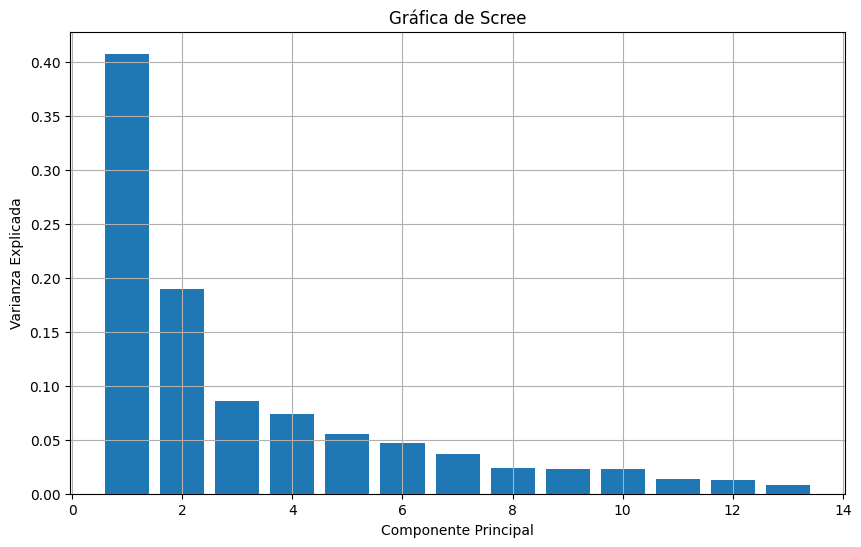

Se necesitan 10 componentes principales para mantener el 95% de la varianza.


In [ ]:
# Calcula la varianza total
total_variance = np.sum(sorted_eigenvalues)

# Calcula la varianza explicada por cada componente principal
explained_variance = sorted_eigenvalues / total_variance

# Trazar la gráfica de Scree
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Gráfica de Scree')
plt.grid(True)
plt.show()

# Calcular cuántos componentes necesitas para mantener el 95% de la varianza
cumulative_variance = np.cumsum(explained_variance)
n_components_needed = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Se necesitan {n_components_needed} componentes principales para mantener el 95% de la varianza.")

In [ ]:
# transformacion de datos
transformed_data  = np.dot(df, eigenvectors[:, :n_components_needed])

transformed_data = pd.DataFrame(transformed_data )
columns = ['A','B','C','D','E','F','G','H','I','J']
transformed_data .columns = columns
transformed_data .head()

,A,B,C,D,E,F,G,H,I,J
0,-3.328917,-2.276744,-1.825942,-1.490294,-0.997975,-0.628053,-0.217888,0.084654,0.318636,0.766522
1,-2.540150,-1.693167,-1.379894,-1.150152,-0.768463,-0.479493,-0.148731,0.071392,0.242680,0.546134
2,-3.247953,-2.198782,-1.780733,-1.466847,-1.029961,-0.685026,-0.257480,0.072619,0.341140,0.791944
3,-3.546404,-2.431309,-2.012552,-1.660540,-1.158906,-0.789471,-0.339832,0.030760,0.268318,0.721860
4,-3.249068,-2.200700,-1.740726,-1.405205,-0.957860,-0.646824,-0.280274,0.059896,0.331605,0.716583


In [ ]:
transformed_data


,A,B,C,D,E,F,G,H,I,J
0,-3.328917,-2.276744,-1.825942,-1.490294,-0.997975,-0.628053,-0.217888,0.084654,0.318636,0.766522
1,-2.540150,-1.693167,-1.379894,-1.150152,-0.768463,-0.479493,-0.148731,0.071392,0.242680,0.546134
2,-3.247953,-2.198782,-1.780733,-1.466847,-1.029961,-0.685026,-0.257480,0.072619,0.341140,0.791944
3,-3.546404,-2.431309,-2.012552,-1.660540,-1.158906,-0.789471,-0.339832,0.030760,0.268318,0.721860
4,-3.249068,-2.200700,-1.740726,-1.405205,-0.957860,-0.646824,-0.280274,0.059896,0.331605,0.716583
...,...,...,...,...,...,...,...,...,...,...
173,-2.885463,-1.714589,-1.367379,-1.052455,-0.675165,-0.433475,-0.143958,0.118283,0.402256,0.720632
174,-2.696009,-1.696820,-1.349133,-1.036285,-0.692736,-0.481506,-0.188819,0.085023,0.339330,0.654949
175,-2.725016,-1.684758,-1.337338,-0.984209,-0.644401,-0.409602,-0.133595,0.107800,0.349030,0.685109
176,-2.710059,-1.684218,-1.304383,-0.946339,-0.649727,-0.436620,-0.148541,0.100918,0.325956,0.647536


### Visualización

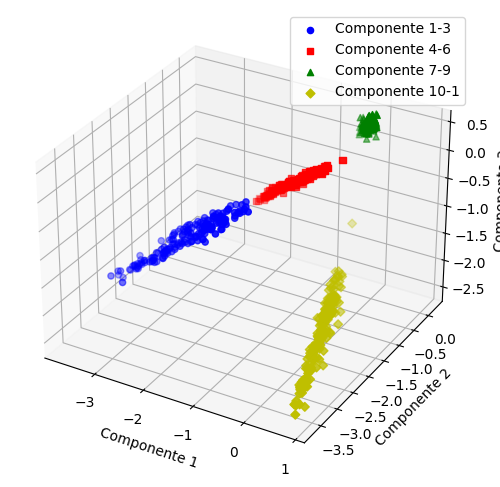

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

componente1 = transformed_data['A']
componente2 = transformed_data['B']
componente3 = transformed_data['C']
componente4 = transformed_data['D']
componente5 = transformed_data['E']
componente6 = transformed_data['F']
componente7 = transformed_data['G']
componente8 = transformed_data['H']
componente9 = transformed_data['I']
componente10 = transformed_data['J']

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(
    componente1, componente2, componente3,
    c='b', marker='o', label='Componente 1-3'
)
ax.scatter(
    componente4, componente5, componente6,
    c='r', marker='s', label='Componente 4-6'
)
ax.scatter(
    componente7, componente8, componente9,
    c='g', marker='^', label='Componente 7-9'
)
ax.scatter(
    componente10, componente1, componente2,
    c='y', marker='D', label='Componente 10-1'
)

ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.legend()
plt.show()


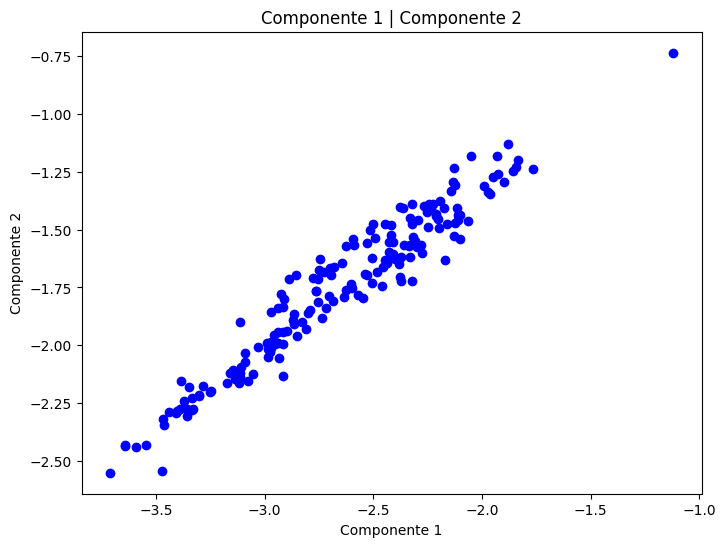

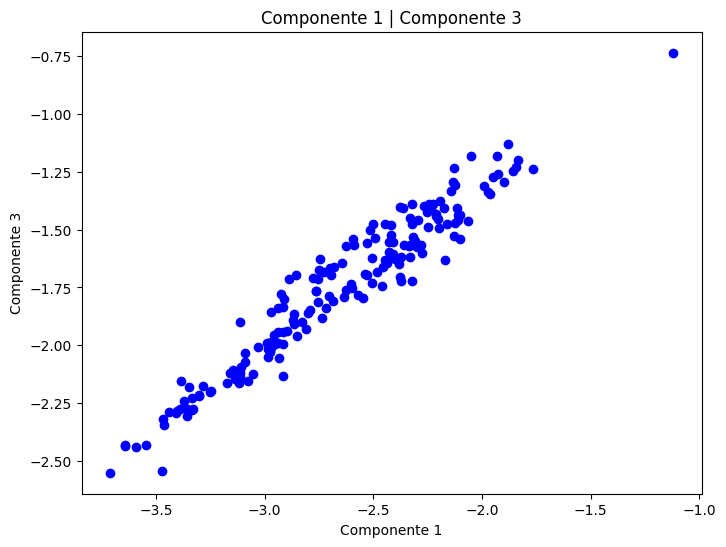

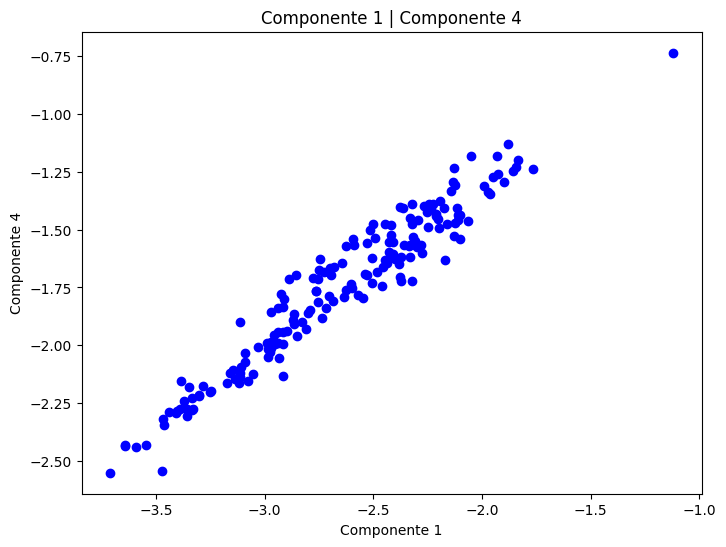

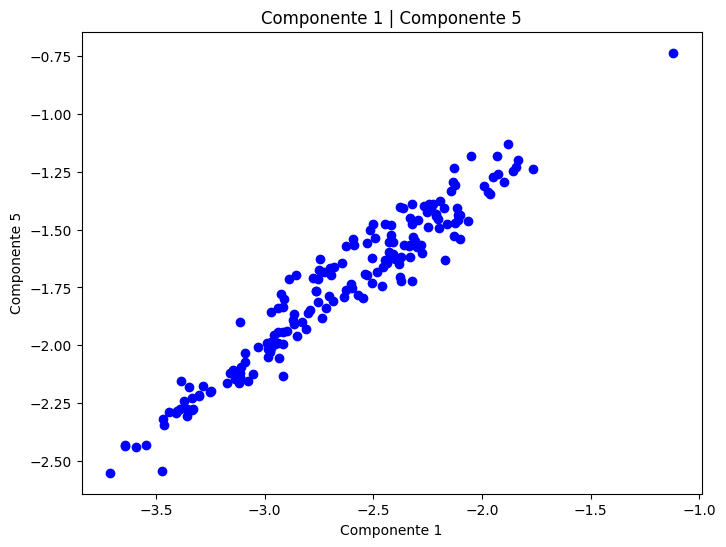

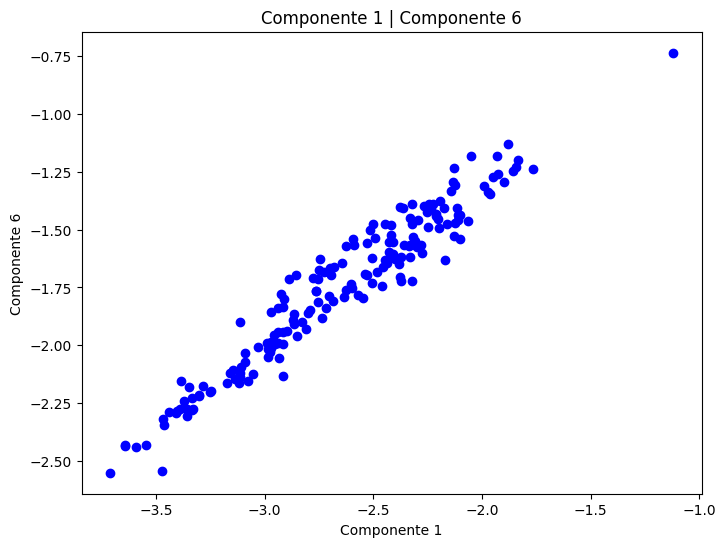

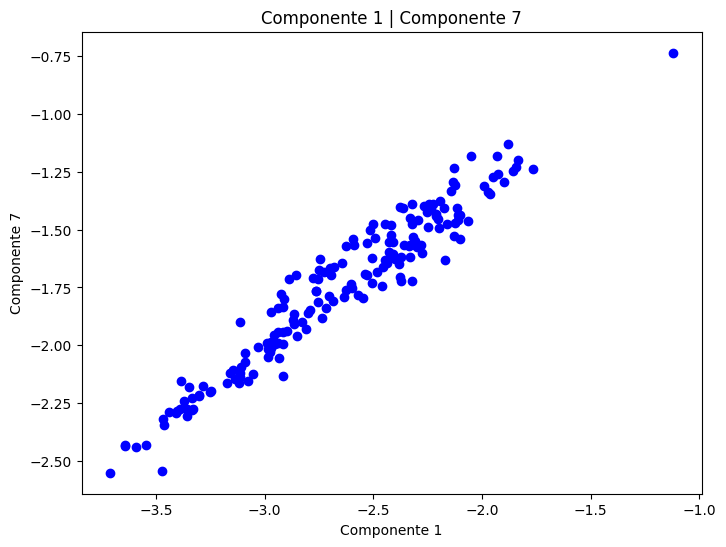

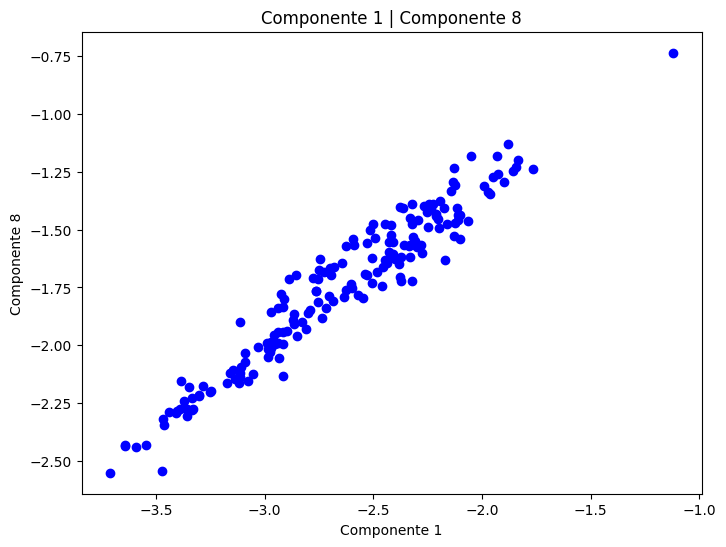

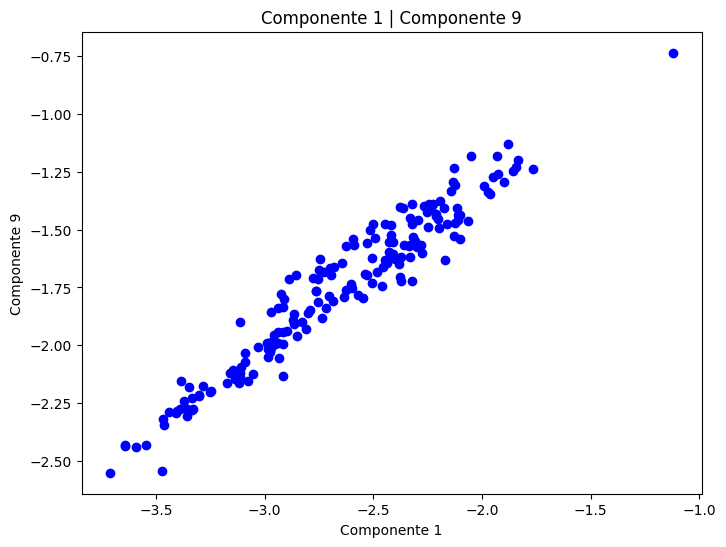

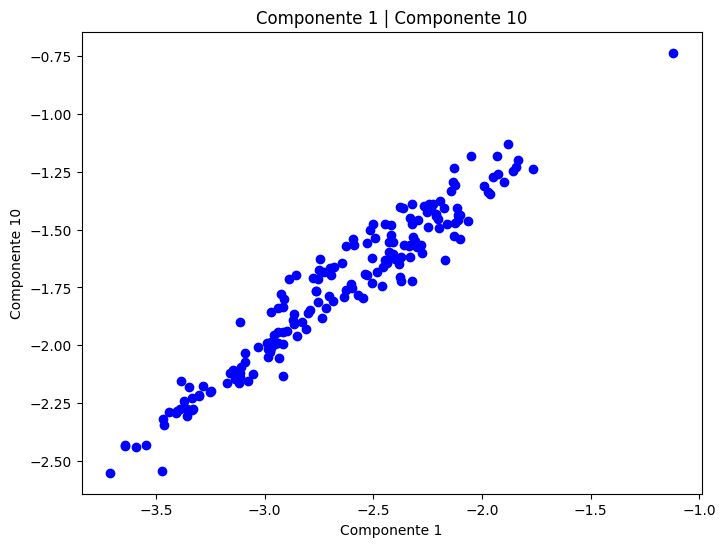

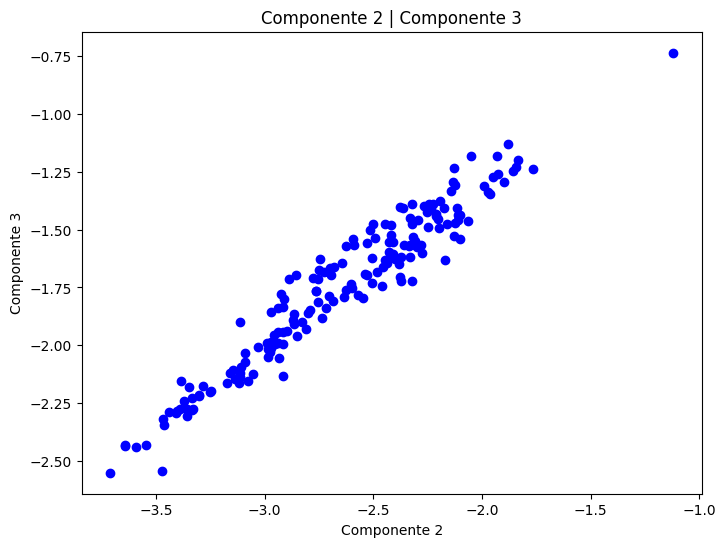

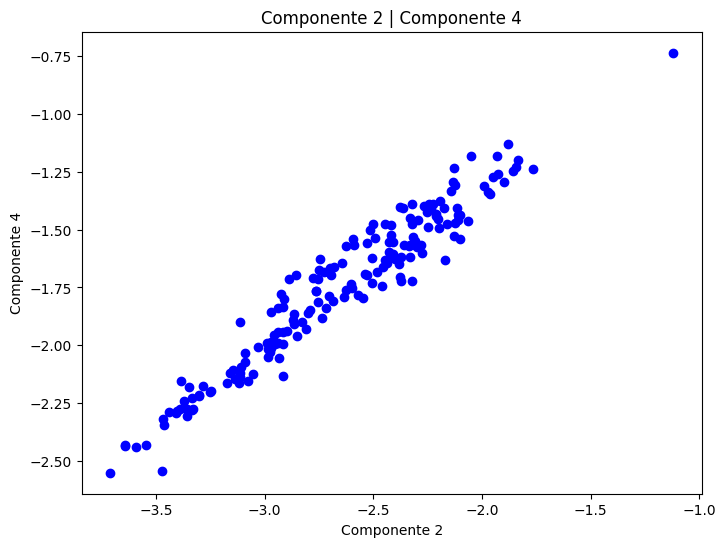

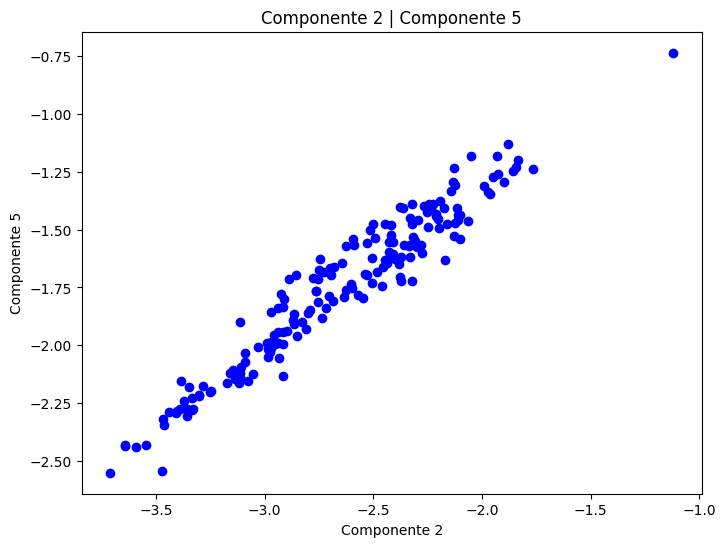

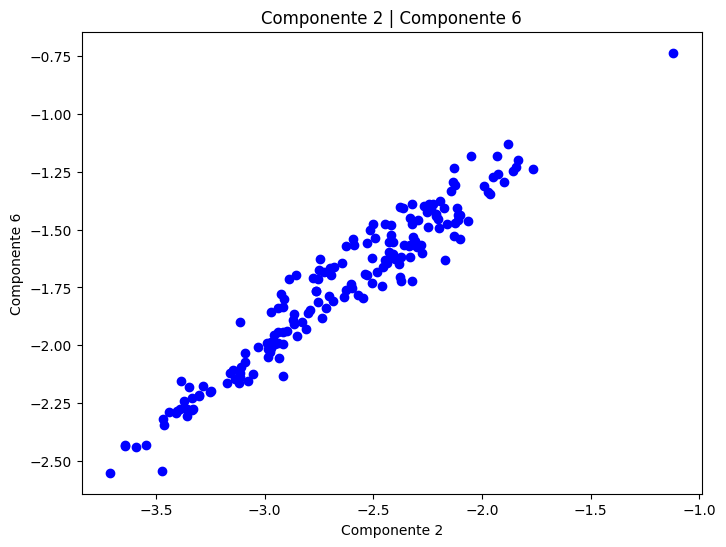

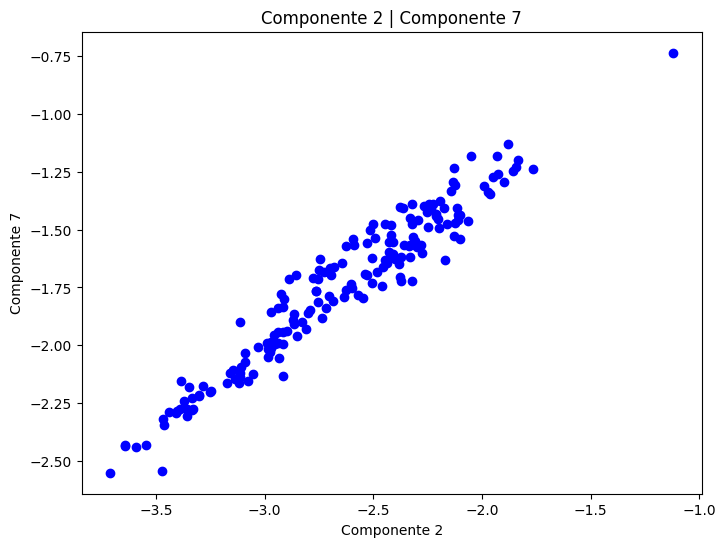

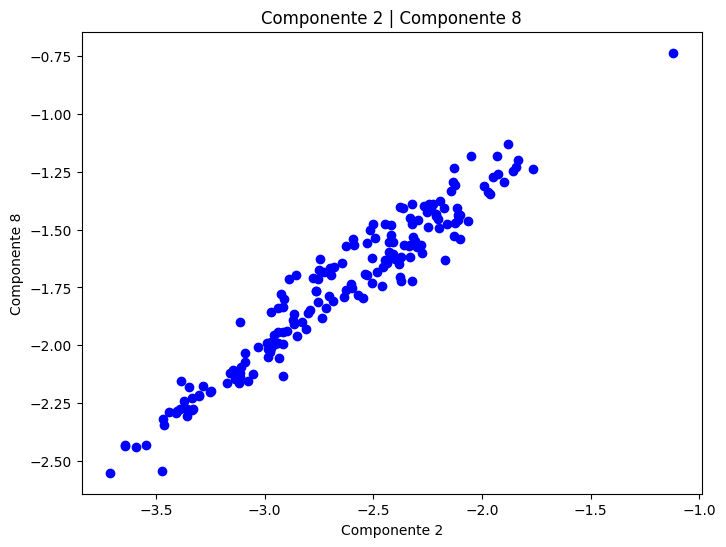

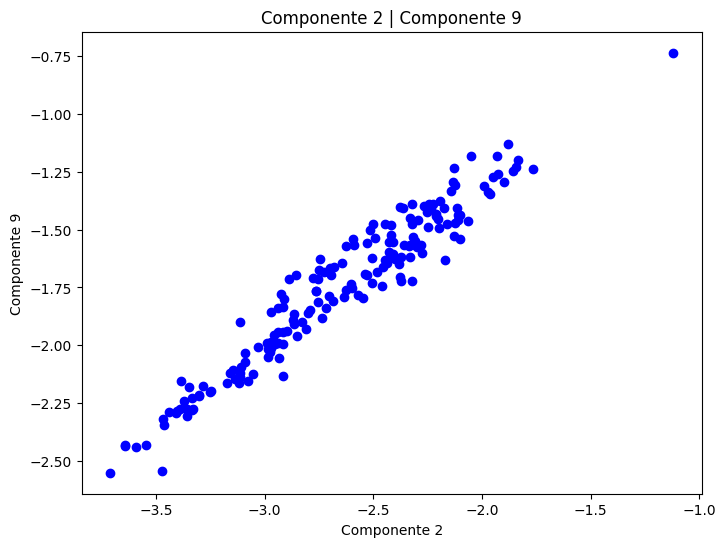

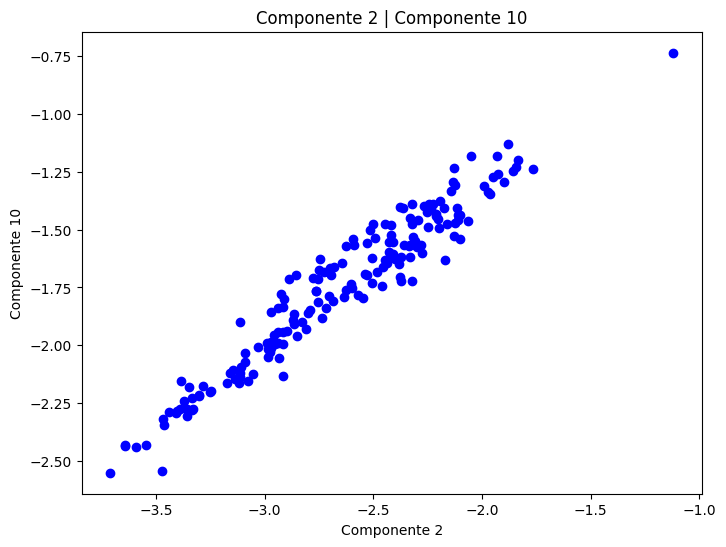

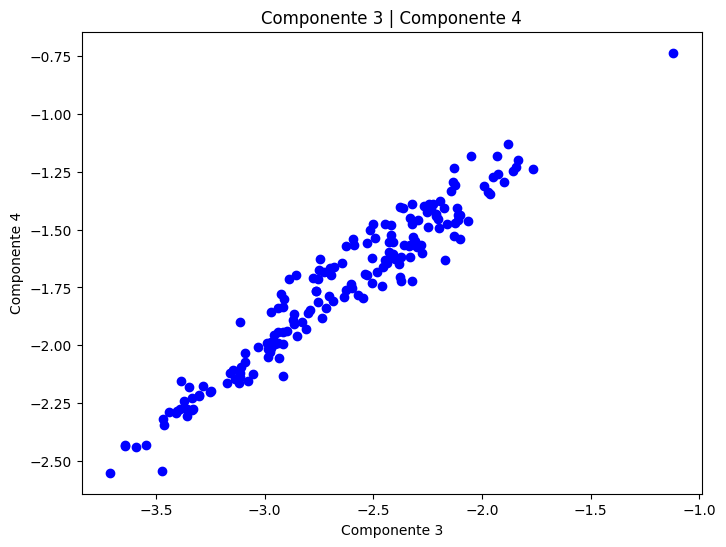

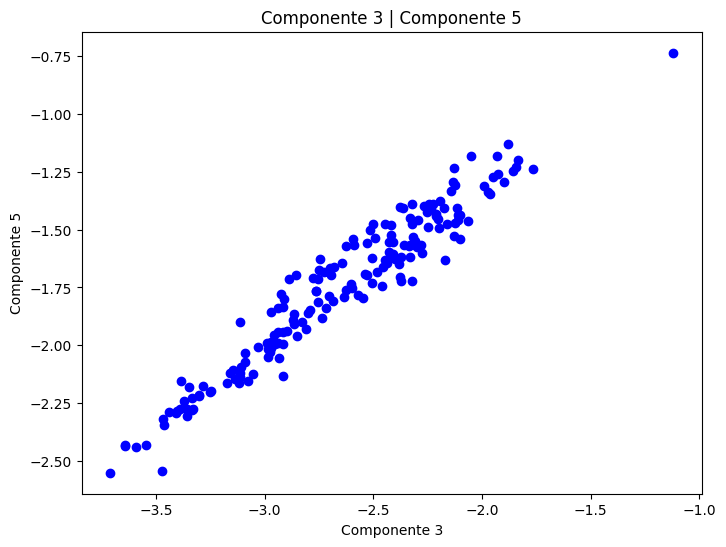

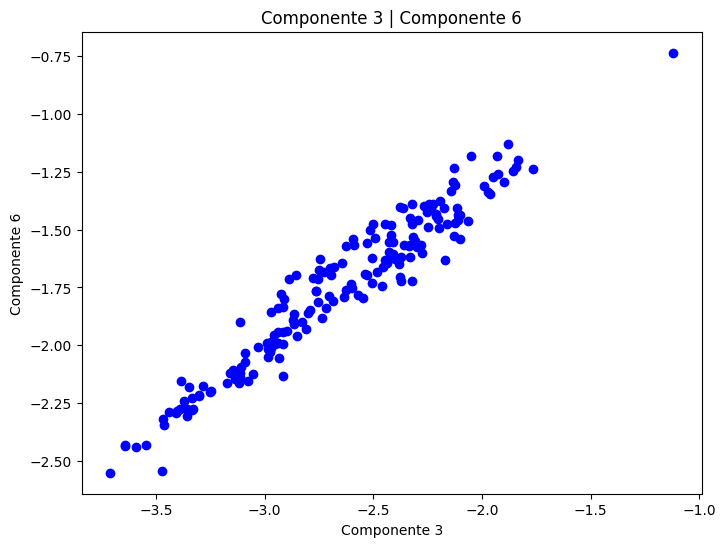

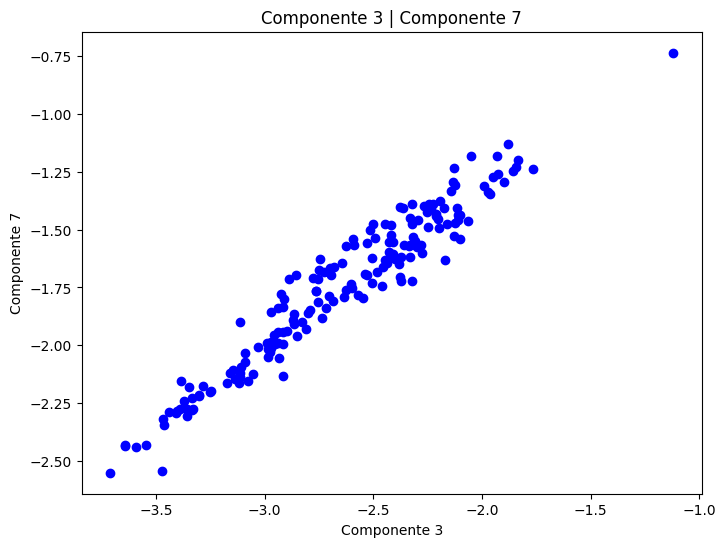

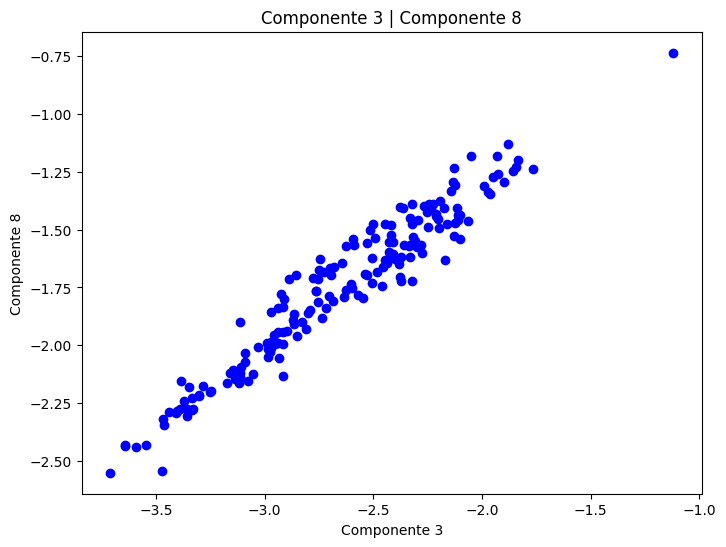

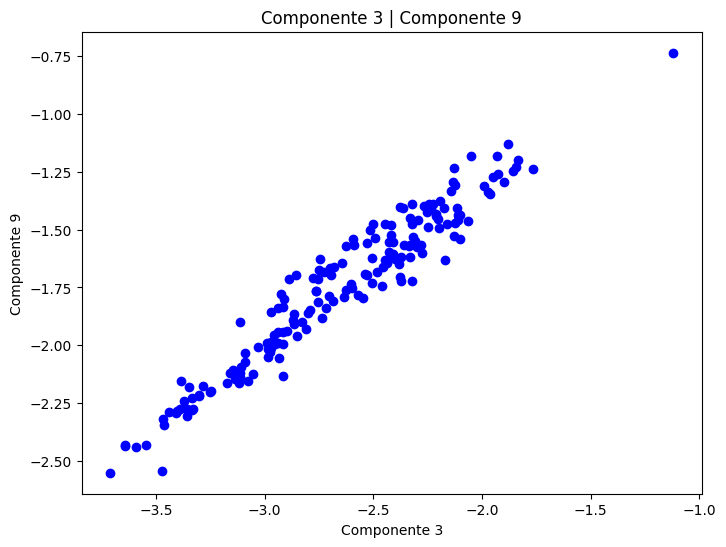

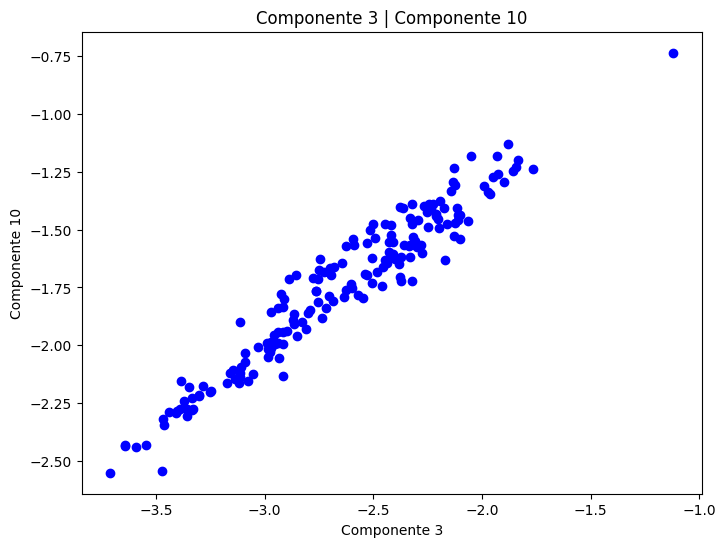

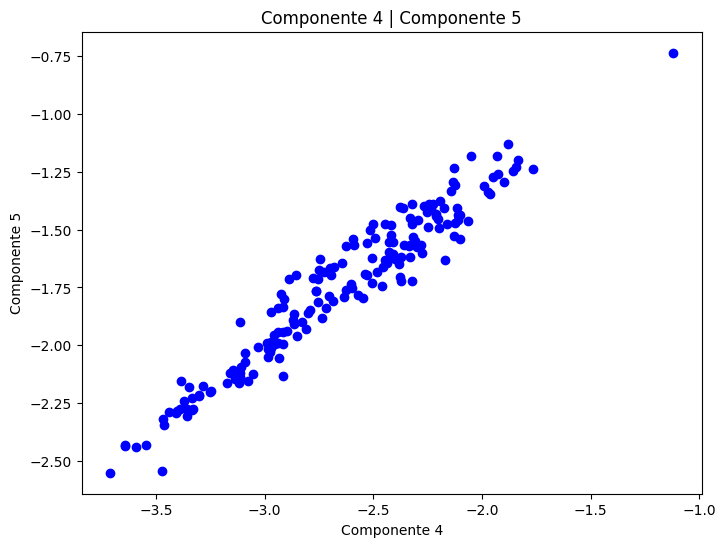

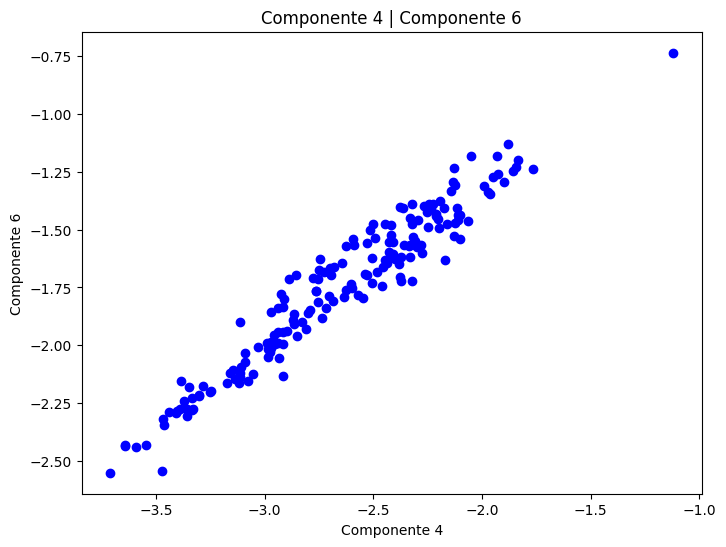

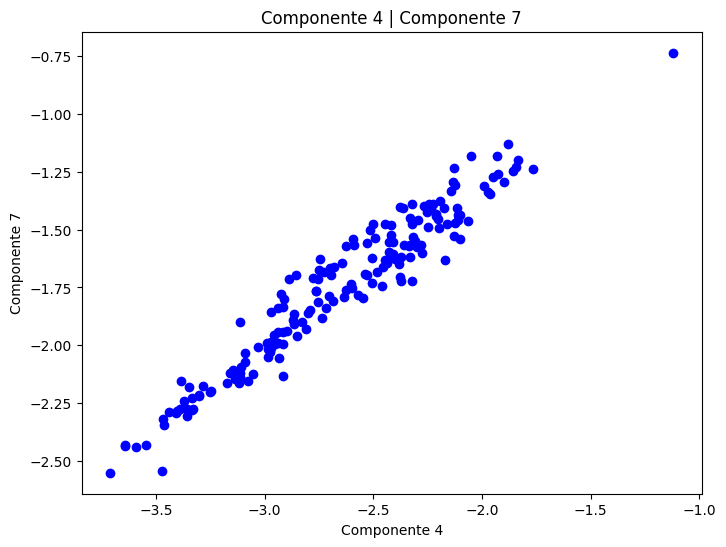

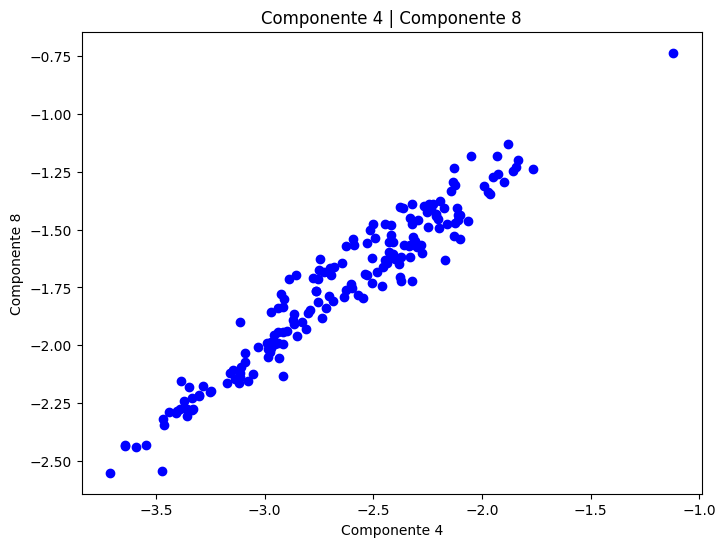

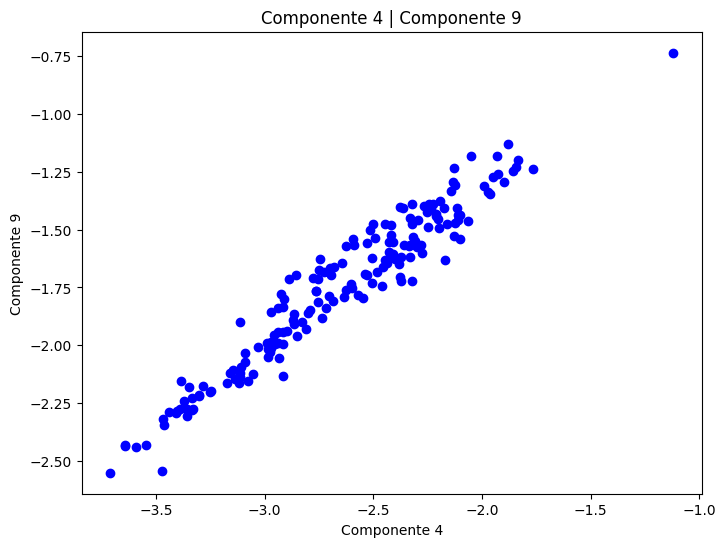

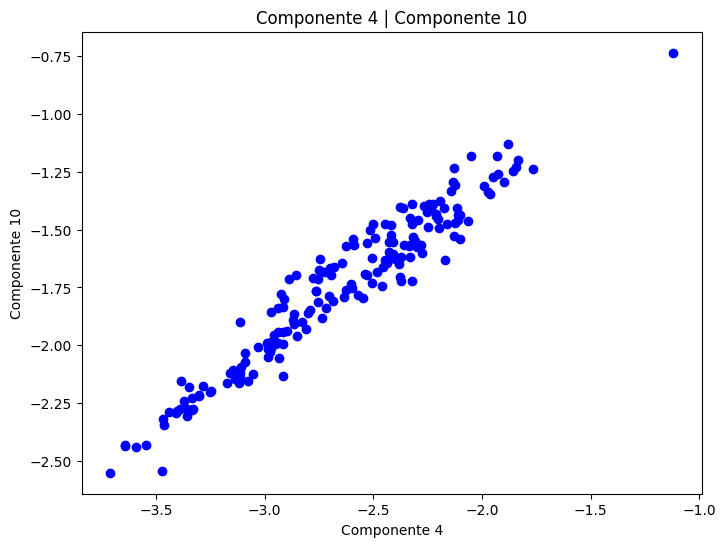

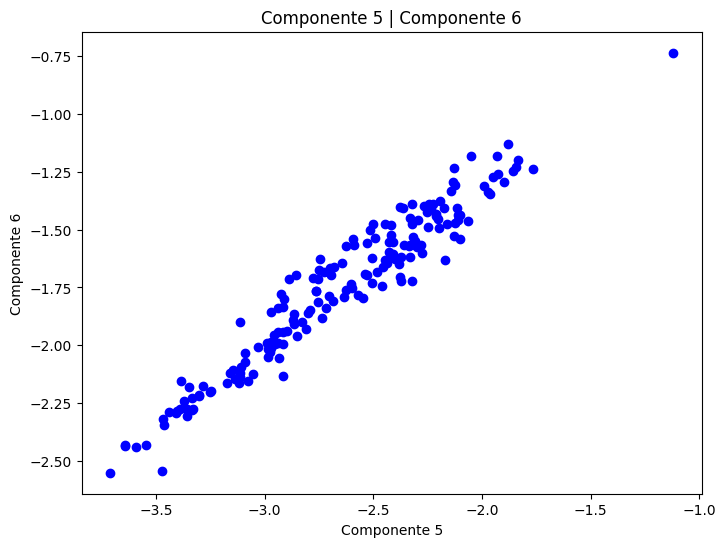

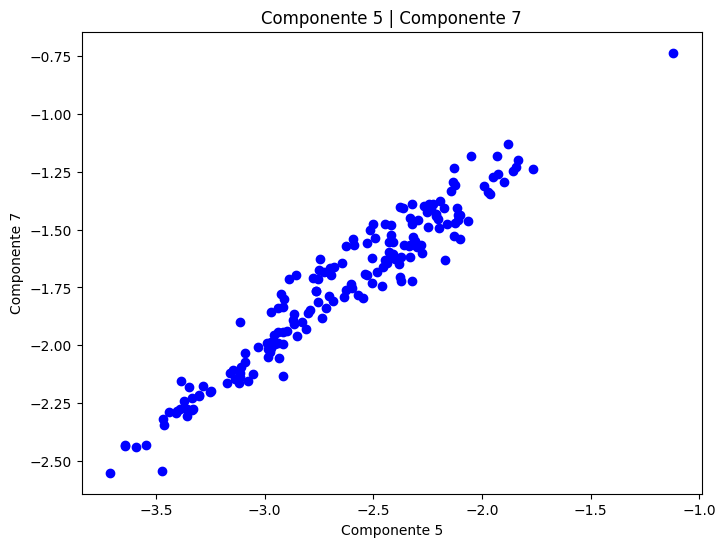

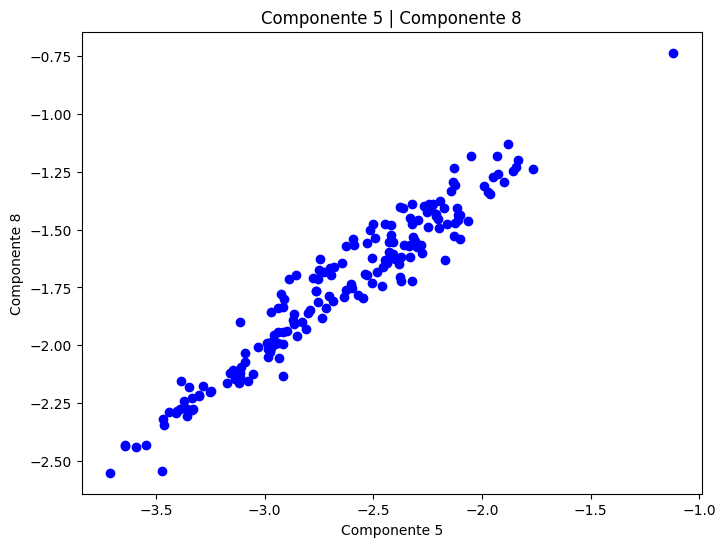

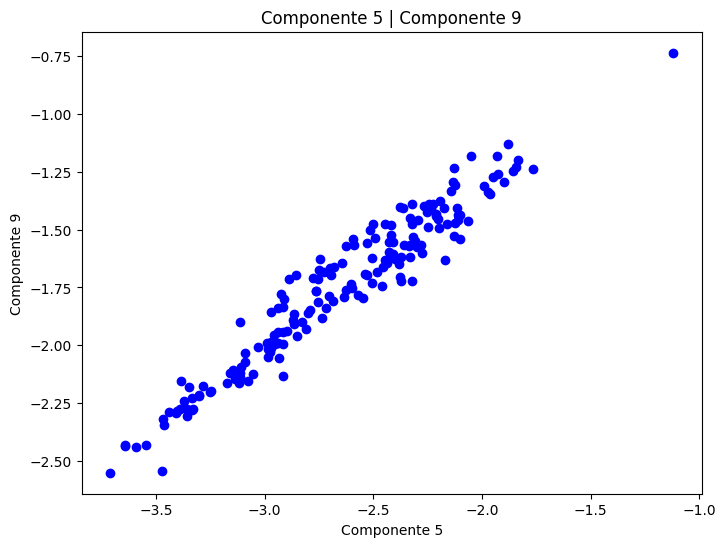

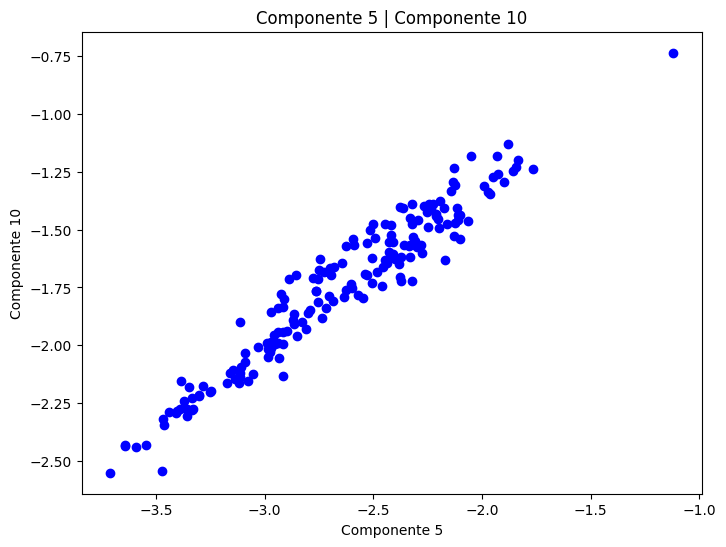

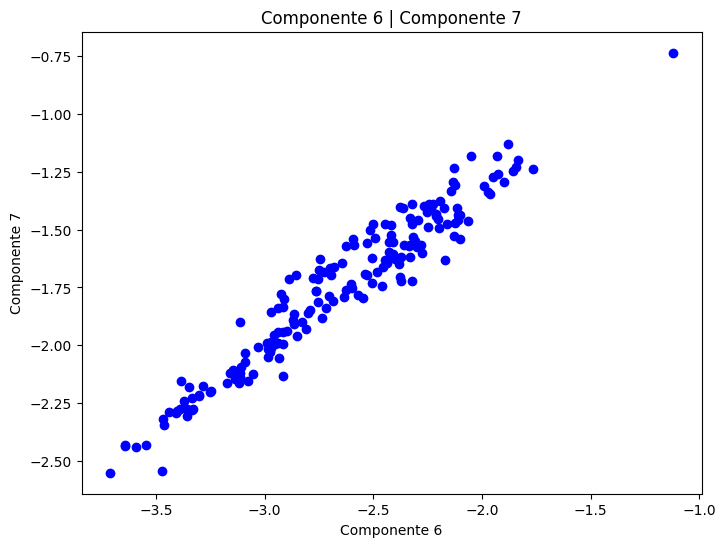

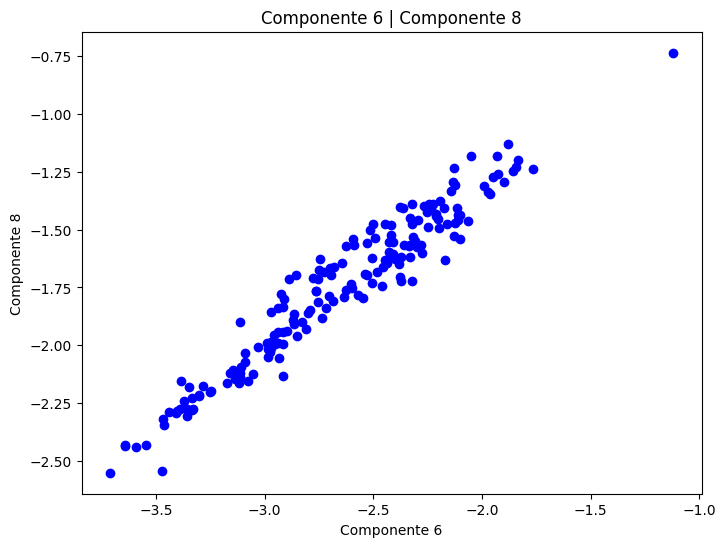

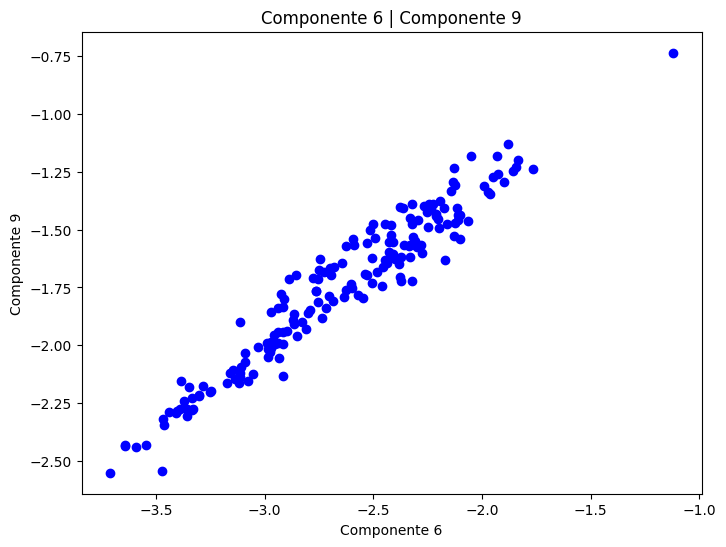

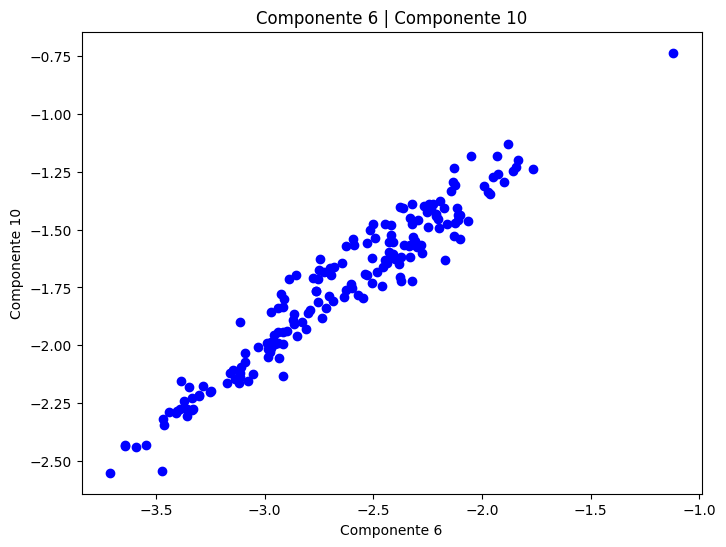

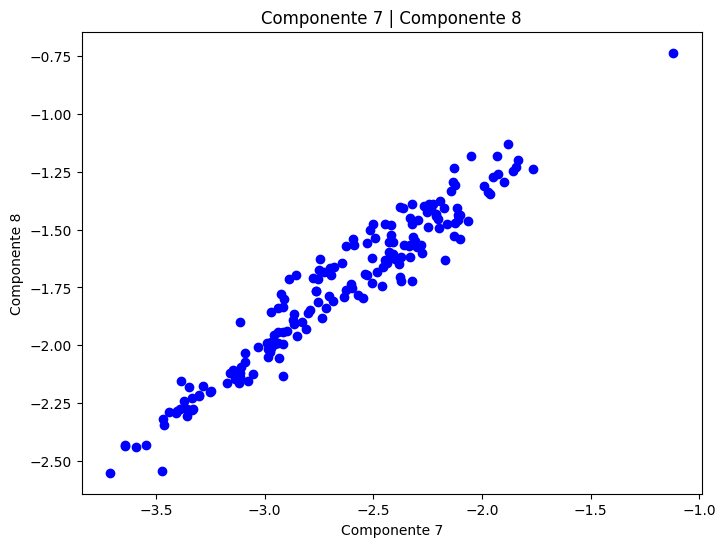

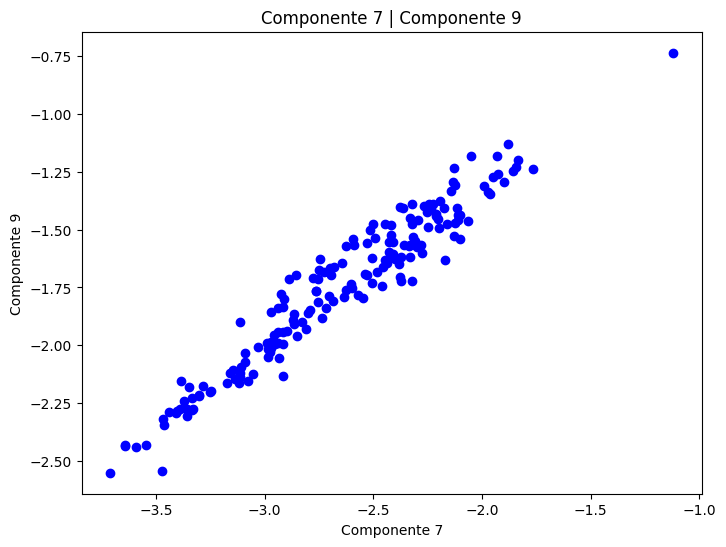

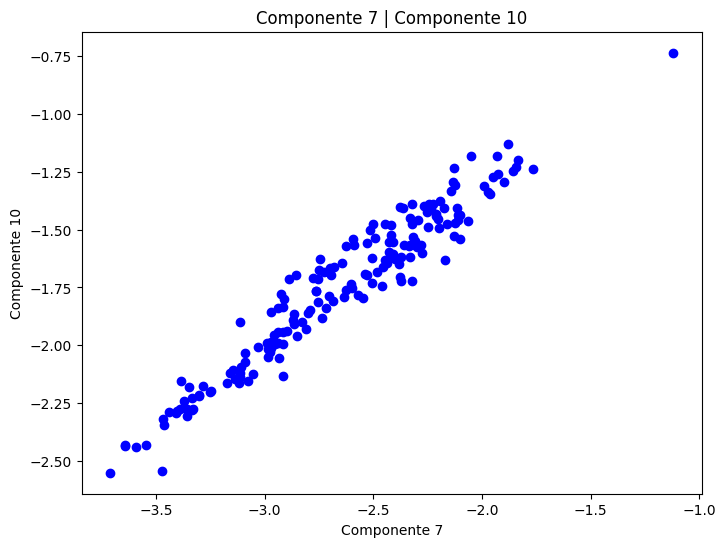

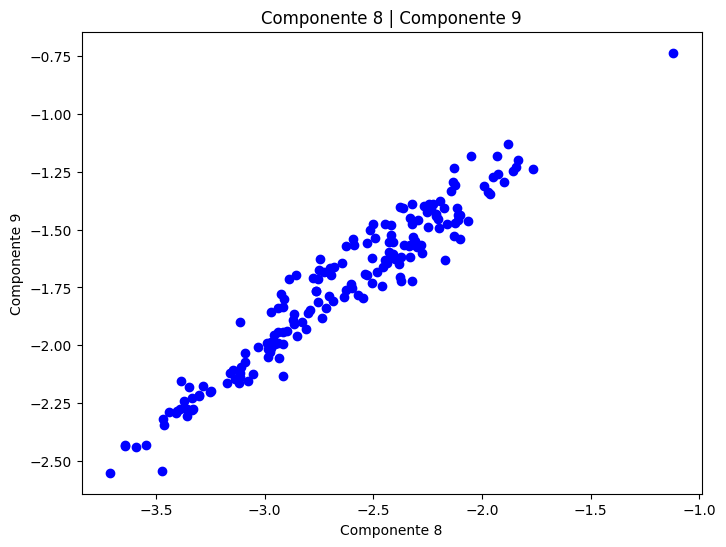

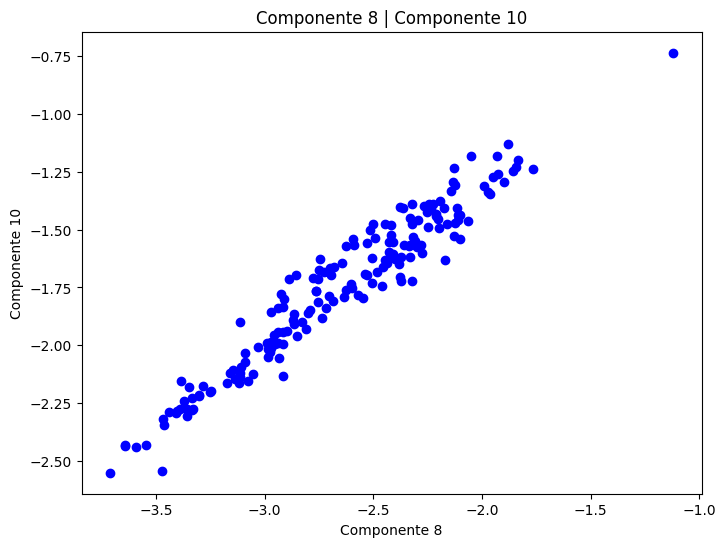

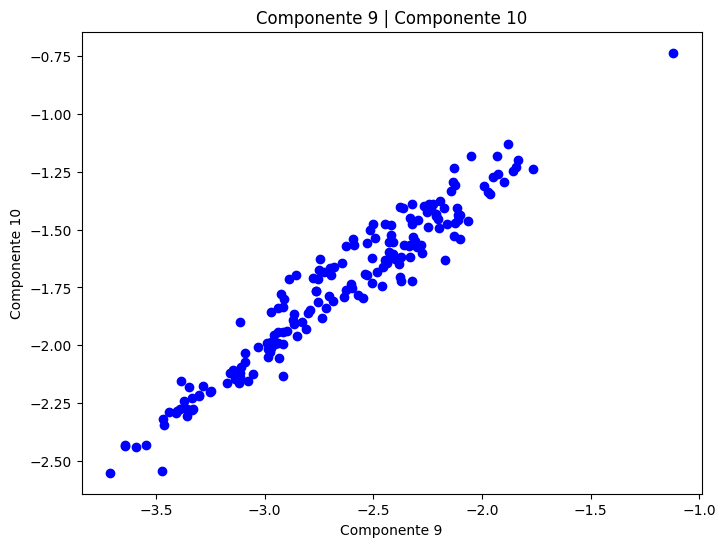

In [ ]:
import itertools
import matplotlib.pyplot as plt

# Definir los números de componente
componentes = list(range(1, 11))

combinaciones = list(itertools.combinations(componentes, 2))

# Iterar a través de las combinaciones y mostrar cada gráfico de dispersión por separado
for comp1, comp2 in combinaciones:
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.scatter(transformed_data[f'A'], transformed_data[f'B'], c='b', marker='o')  # Reemplaza 'A' y 'B' por los nombres de columna correctos
    ax.set_xlabel(f'Componente {comp1}')
    ax.set_ylabel(f'Componente {comp2}')
    ax.set_title(f'Componente {comp1} | Componente {comp2}')

    plt.show()





### **Clasificasión/regresión lineal**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Datos originales**

In [ ]:
#datos originales
X_original = df[['C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']]
y_original = df['B']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_original , y_original , random_state = 42)
regre = LinearRegression()
regre.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predicciones
y_pred = regre.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio = ",mse)

Error Cuadrático Medio =  0.016068923159403944


**Datos transformados**

In [ ]:
#Datos tranformados
X_original = transformed_data[['B','C', 'D','E', 'F', 'G', 'H', 'I', 'J']]
y_original = transformed_data['A']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_original , y_original , random_state = 42)
regre = LinearRegression()
regre.fit(X_train, y_train)


LinearRegression()

In [ ]:
#Predicciones
y_pred = regre.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio = ",mse)

Error Cuadrático Medio =  0.00284169079364516
